### A US-based housing company named Surprise Housing has decided to enter the Australian market. 

The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

#### Data Understanding and Exploration

In [1]:
#Importing the requied libraries for the analysis and model building

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


pd.set_option('display.max_rows', None)
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data set and printing the first 5 rows
housing_data=pd.read_csv("train.csv")
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Getting the information about the given dataframe
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# dropping the id column as this will not be useful for the analysis
housing_data=housing_data.drop('Id',axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### As per the above information, there are 1460 rows in the data frame and most of the columns in the data frame have null values

We need to treat the missing or null values in the data set

In [5]:
#Checking the percentage of the null values present in the dataset for each column
value_data=housing_data.isnull().sum()/len(housing_data)*100
value_data=value_data[value_data!=0]
value_data

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [6]:
# There are certain columns in the data set having more than 90 % or more than 80% of null data, removing 
# these columns as it will not help in the data analysis or model building
columns_having_more_missing_values=value_data[value_data>80]
print(columns_having_more_missing_values)

housing_data=housing_data.drop(list(columns_having_more_missing_values.index),axis=1)
housing_data.head()

Alley          93.767123
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [7]:
#Checking the percentage of the null values present in the dataset for each column
# defining a function to check the values
def check_null_values_in_data():
    value_data=housing_data.isnull().sum()
    value_data=value_data[value_data!=0]
    return value_data

check_null_values_in_data()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [8]:
# Checking the different values in Electrical column
housing_data.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

#### Since most of the values in the Electrical column are same, it wont help much in the model building, dropping this column

In [9]:
# Dropping Electrical column from dataframe
housing_data=housing_data.drop('Electrical',axis=1)

In [10]:
# Checking the distinct values in FireplaceQu
housing_data.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [11]:
# FirePlace Quality column has 690 null values, checking the number of rows where fireplaces is also 0 
housing_data[(housing_data.FireplaceQu.isnull()) & (housing_data.Fireplaces==0)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
10,20,RL,70.0,11200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,129500
12,20,RL,NaN,12968,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,0,0,176,0,0,9,2008,WD,Normal,144000
15,45,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,7,2007,WD,Normal,132000
17,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,500,10,2006,WD,Normal,90000
18,20,RL,66.0,13695,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,Normal,159000
19,20,RL,70.0,7560,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2009,COD,Abnorml,139000
26,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,134800
29,30,RM,60.0,6324,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,87,0,0,0,0,5,2008,WD,Normal,68500


### Above suggest that all the rows where FireQuality is null, also has the number of fireplaces as zero
### this is acceptable, where the number of fireplaces is 0, replacing the null values with 'No Fireplace' for those rows

In [12]:

housing_data['FireplaceQu']=housing_data.FireplaceQu.apply(lambda value :'No Fireplace' if pd.isnull(value) else value)

In [13]:
# Describe the LotFrontage which has certain missing values
housing_data.LotFrontage.describe()


count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [14]:
# Since there are no outliers in the data (as mean and median are almost equal),
# hence populating the null values with the mean value

housing_data['LotFrontage']=housing_data.LotFrontage.apply(lambda value :housing_data.LotFrontage.mean() if pd.isnull(value) else value)

In [15]:
# Checking the number of the null values present in the dataset for each column
check_null_values_in_data()

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [16]:
# Check different values in MasVnrType which has certain missing values
housing_data.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [17]:
# Populating the null data in the MasVnrType with the Mode value of the column

housing_data['MasVnrType']=housing_data.MasVnrType.apply(lambda value :housing_data.MasVnrType.mode()[0] if pd.isnull(value) else value)

In [18]:
# Checking value count to assert if applying mode operation was a success
housing_data.MasVnrType.value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [19]:
# Checking the number of the null values present in the dataset for each column
check_null_values_in_data()

MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [20]:
# Describe the MasVnrArea which has certain missing values
housing_data.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [21]:
# A lot of the values in the MasVnrArea of the data set are 0, populating the values with the median of the data set


housing_data['MasVnrArea']=housing_data.MasVnrArea.apply(lambda value :housing_data.MasVnrArea.median() if pd.isnull(value) else value)

In [22]:
# Checking the number of the null values present in the dataset for each column
check_null_values_in_data()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [23]:
# Check the value count for MasVnrArea which has certain missing values
housing_data.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [24]:
# Populating the null data in the BsmtQual with the 'No Basement' value of the column

housing_data['BsmtQual']=housing_data.BsmtQual.apply(lambda value :'No Basement' if pd.isnull(value) else value)

# Checking the number of the null values present in the dataset for each column
check_null_values_in_data()

BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [25]:
# Check the value count for BsmtCond which has certain missing values
housing_data.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [26]:
# Since most of the data in BsmtCond have same value i.e TA, hence dropping this column, as it doesnt look to be good 
# predictor for the model

# Dropping BsmtCond column from dataframe
housing_data=housing_data.drop('BsmtCond',axis=1)

In [27]:
# Checking the number of the null values present in the dataset for each column
check_null_values_in_data()

BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [28]:
# Check the value count for BsmtExposure which has certain missing values
housing_data.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [29]:
# Populating the null data in the BsmtExposure with the Mode value of the column

housing_data['BsmtExposure']=housing_data.BsmtExposure.apply(lambda value :housing_data.BsmtExposure.mode()[0] if pd.isnull(value) else value)

# Checking the number of the null values present in the dataset for each column
check_null_values_in_data()

BsmtFinType1    37
BsmtFinType2    38
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [30]:
# Check the value count for BsmtFinType1 which has certain missing values
housing_data.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [31]:
# Populating the null data in the BsmtFinType1 with 'No Basement' value, as the value is null where data is not present

housing_data['BsmtFinType1']=housing_data.BsmtFinType1.apply(lambda value :'No Basement'if pd.isnull(value) else value)

# Checking the number of the null values present in the dataset for each column
check_null_values_in_data()

BsmtFinType2    38
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [32]:
# Check the value count for BsmtFinType2 which has certain missing values
housing_data.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [33]:
# Since most of the data in BsmtFinType2 have same value i.e Unf, hence dropping this column, as it doesnt look to be good 
# predictor for the model

# Dropping BsmtFinType2 column from dataframe
housing_data=housing_data.drop('BsmtFinType2',axis=1)

In [34]:
# Checking the number of the null values present in the dataset for each column
check_null_values_in_data()

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [35]:
# Checking the different values in GarageQual
housing_data.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [36]:
# Since most of the data in GarageQual have same value i.e TA, hence dropping this column, as it doesnt look to be good 
# predictor for the model

# Dropping GarageQual column from dataframe
housing_data=housing_data.drop('GarageQual',axis=1)

In [37]:
# Checking the different values in GarageCond
housing_data.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [38]:
# Since most of the data in GarageCond have same value i.e TA, hence dropping this column, as it doesnt look to be good 
# predictor for the model

# Dropping GarageCond column from dataframe
housing_data=housing_data.drop('GarageCond',axis=1)

In [39]:
# Populating the null data in the GarageType with the 'No Garage' value of the column

housing_data['GarageType']=housing_data.GarageType.apply(lambda value :'No Garage' if pd.isnull(value) else value)

# Populating the null data in the GarageYrBlt with the 'No Garage' value of the column

housing_data['GarageYrBlt']=housing_data.GarageYrBlt.apply(lambda value :'No Garage' if pd.isnull(value) else value)

# Populating the null data in the GarageFinish with the 'No Garage' value of the column

housing_data['GarageFinish']=housing_data.GarageFinish.apply(lambda value :'No Garage' if pd.isnull(value) else value)


In [40]:
# Checking the number of the null values present in the dataset for each column
check_null_values_in_data()

Series([], dtype: int64)

In [41]:
# Describing the whole data again for the outliers if present
housing_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Data visualization 

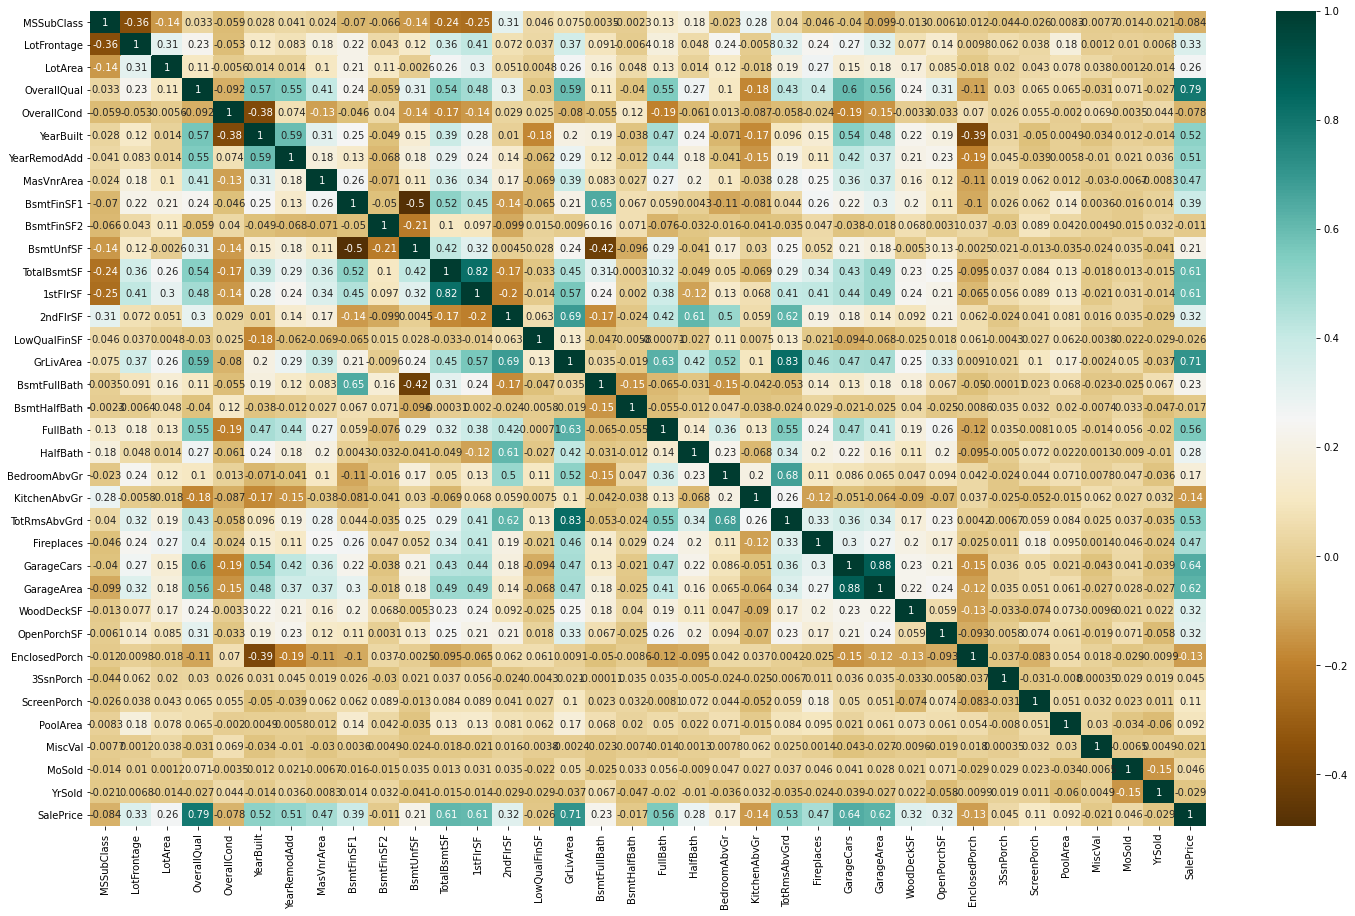

In [42]:
# Checking the coorelation between the variables
plt.figure(figsize=(25,15))
sns.heatmap(housing_data.corr(),cmap='BrBG',annot=True)
plt.show()

In [43]:
# Printing Correlation again for only SalePrice
housing_data.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.334901
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.472614
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [44]:
# As per the above heatmap, there is weak correaltion between SalePrice and OverallCond,BsmtFinSF2,MiscVal,MoSold,
# MSSubClass, LowQualFinSF,BsmtHalfBath,3SsnPorch
# Dropping these columns having weak correlation with Target Variable

housing_data=housing_data.drop(['OverallCond','BsmtFinSF2','MiscVal','MoSold','MSSubClass','LowQualFinSF','BsmtHalfBath','3SsnPorch'],axis=1)

<Figure size 1440x864 with 0 Axes>

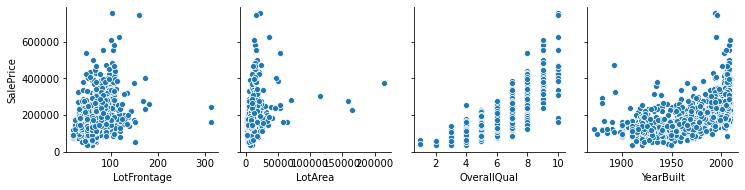

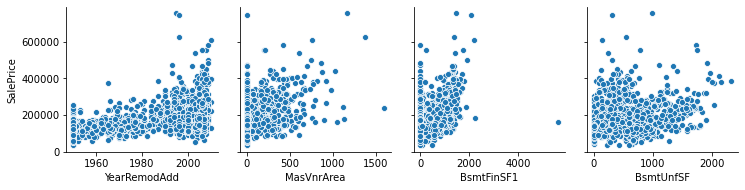

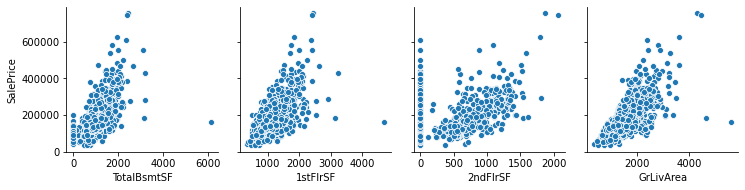

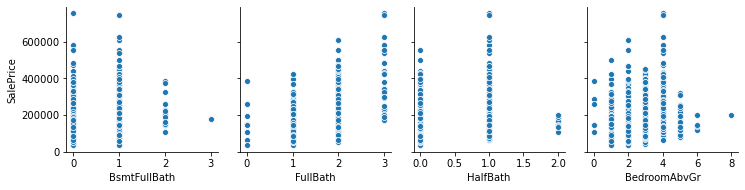

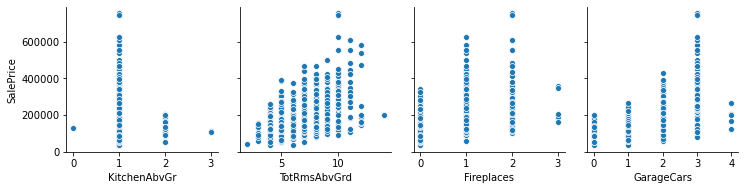

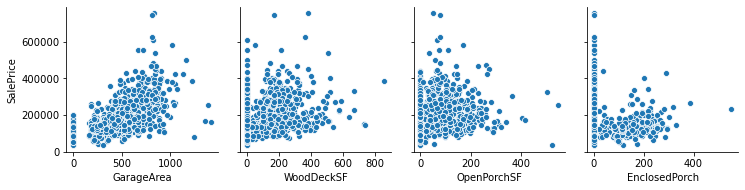

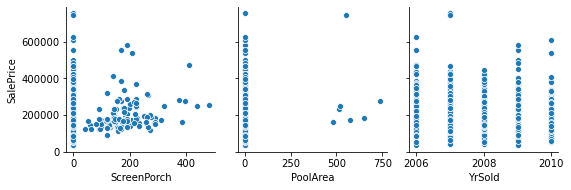

In [45]:
# Getting the numerical columns list to create the pair plot

numerical_cols=list(housing_data.select_dtypes(include=np.number).drop('SalePrice',axis=1).columns)


# Plotting a pair plot for the variables present in the data
start_index=0
plt.figure(figsize=(20, 12))

# Creating a loop to plot all the columns 
for count in range(0,int(np.ceil(len(numerical_cols)/4))):
    sns.pairplot(housing_data,x_vars=numerical_cols[start_index:start_index+4],y_vars=['SalePrice'])
    start_index=start_index+4

plt.show()

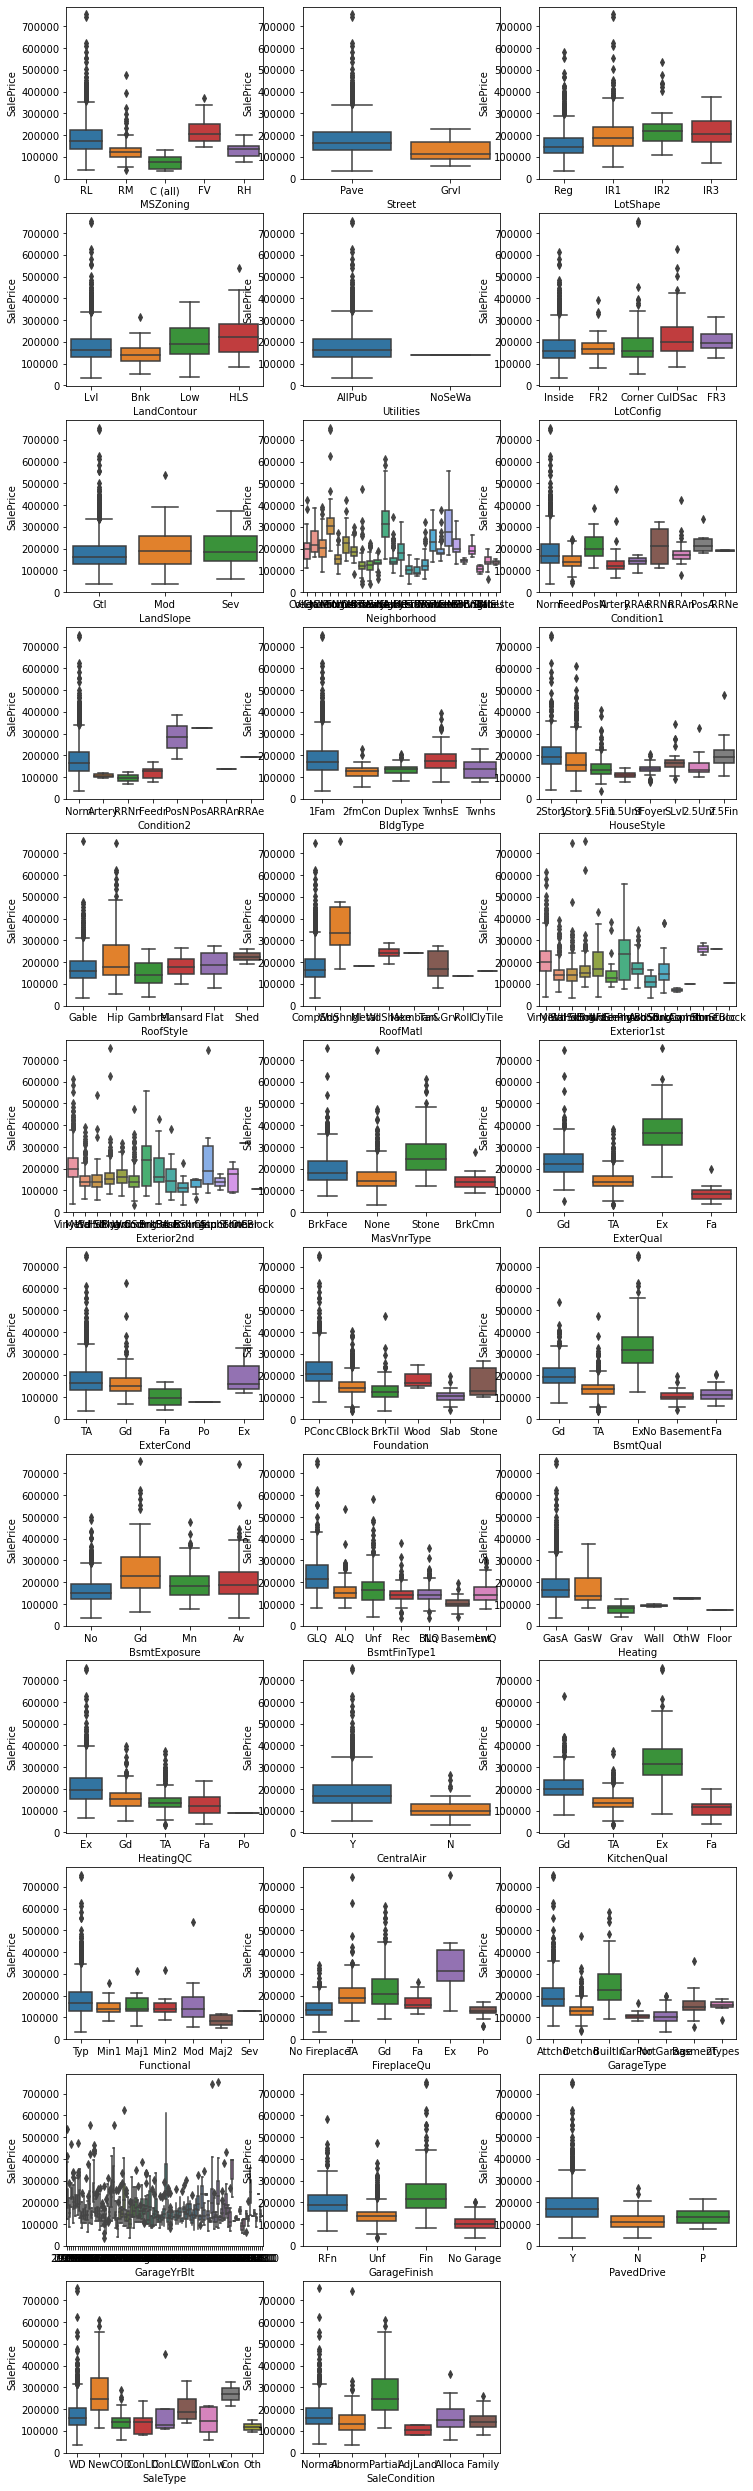

In [46]:
# Getting the categorical columns list to create the pair plot

categorical_cols=list(housing_data.select_dtypes(include="object").columns)

# Plotting the box plots for all the categorical data columns against the target variable
plt.figure(figsize=(12, 45))
for count in range(0,len(categorical_cols)):
    plt.subplot(12,3,count+1)
    sns.boxplot(x = categorical_cols[count], y = 'SalePrice', data = housing_data)
plt.show()

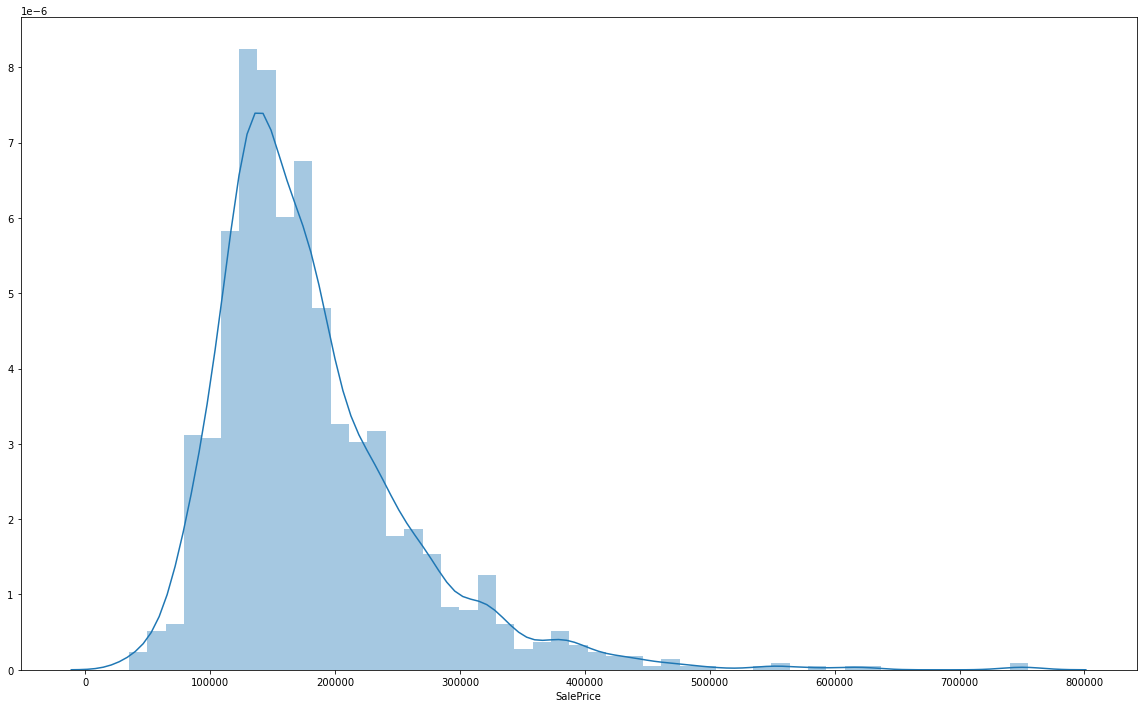

In [47]:
# Visualizing the distribution of the target variable i.e SalePrice
plt.figure(figsize=(20, 12))
sns.distplot(housing_data['SalePrice'])
plt.show()

#### Above distribution suggests there are some outliers as well in the Target variable

### Data Preperation

In [48]:
# Defining a generic function for converting all the category variables to the dummies and concat with dataframe

def concert_category_to_dummy(dataframe,catgory):
    prefixCode=catgory+"_"
    dummies = pd.get_dummies(dataframe[catgory], prefix=prefixCode, drop_first = True)
    dataframe = pd.concat([dataframe, dummies], axis = 1)
    dataframe.drop([catgory], axis = 1, inplace = True)
    return dataframe

In [49]:
# Checking the different categories in Neighborhood

housing_data.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [50]:
# Reducing the categories in the Neighborhood columns, replacing the values <30 with Others

housing_data['Neighborhood'].replace({'ClearCr':'Others'},inplace=True)
housing_data['Neighborhood'].replace({'SWISU':'Others'},inplace=True)
housing_data['Neighborhood'].replace({'StoneBr':'Others'},inplace=True)
housing_data['Neighborhood'].replace({'Blmngtn':'Others'},inplace=True)
housing_data['Neighborhood'].replace({'MeadowV':'Others'},inplace=True)
housing_data['Neighborhood'].replace({'BrDale':'Others'},inplace=True)
housing_data['Neighborhood'].replace({'Veenker':'Others'},inplace=True)
housing_data['Neighborhood'].replace({'NPkVill':'Others'},inplace=True)
housing_data['Neighborhood'].replace({'Blueste':'Others'},inplace=True)
housing_data.Neighborhood.value_counts()

NAmes      225
Others     150
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
Name: Neighborhood, dtype: int64

In [51]:
# Calculating the age of the house using the given columns YearBuilt and YrSold
housing_data['HouseAge']=housing_data.YrSold - housing_data.YearBuilt

In [52]:
# Checking all the columns after the above operation
housing_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [53]:
# Using the year column YearRemodAdd to see if the house was ever remodel and creating a new column reflecting the same

housing_data['IsHouseRemodel']=housing_data.YearBuilt != housing_data.YearRemodAdd
housing_data['IsHouseRemodel']=housing_data.IsHouseRemodel.map({False:0,True:1})

In [54]:
# Checking the new column to see if the operation was a success
housing_data.IsHouseRemodel.value_counts()

0    764
1    696
Name: IsHouseRemodel, dtype: int64

In [55]:
# There is one more year column in the data set, GarageYrBlt, as we have other columns which can reflect the 
# conditions of Garage on the target variable, hence dropping this column as well


# dropping the year columns used in calculation of the age, as we use the derived column for the model building
housing_data.drop(['YearBuilt','YrSold','YearRemodAdd','GarageYrBlt'],axis=1,inplace=True)


In [56]:
# Checking all the columns after the above operation
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSZoning        1460 non-null   object 
 1   LotFrontage     1460 non-null   float64
 2   LotArea         1460 non-null   int64  
 3   Street          1460 non-null   object 
 4   LotShape        1460 non-null   object 
 5   LandContour     1460 non-null   object 
 6   Utilities       1460 non-null   object 
 7   LotConfig       1460 non-null   object 
 8   LandSlope       1460 non-null   object 
 9   Neighborhood    1460 non-null   object 
 10  Condition1      1460 non-null   object 
 11  Condition2      1460 non-null   object 
 12  BldgType        1460 non-null   object 
 13  HouseStyle      1460 non-null   object 
 14  OverallQual     1460 non-null   int64  
 15  RoofStyle       1460 non-null   object 
 16  RoofMatl        1460 non-null   object 
 17  Exterior1st     1460 non-null   o

In [57]:
# Getting the categorical columns list for creating the dummies

categorical_cols=list(housing_data.select_dtypes(include="object").columns)
categorical_cols

for index in range(0,len(categorical_cols)):
    # Calling the function for category variable
    housing_data=concert_category_to_dummy(housing_data,categorical_cols[index])

# Checking the dataframe after dummy conversion
housing_data.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial
0,65.0,8450,7,196.0,706,150,856,856,854,1710,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,0.0,978,284,1262,1262,0,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,162.0,486,434,920,920,866,1786,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,0.0,216,540,756,961,756,1717,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,350.0,655,490,1145,1145,1053,2198,...,0,0,0,0,1,0,0,0,1,0


### Splitting the data into Test and Train sets

In [58]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

housing_data_train, housing_data_test = train_test_split(housing_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [59]:
# getting the list of all numerical columns from the data set
numerical_cols=list(housing_data.select_dtypes(exclude="uint8").columns)
numerical_cols.remove('IsHouseRemodel')
numerical_cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'SalePrice',
 'HouseAge']

In [60]:
# Creating a scaler for the scaling purpose
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [61]:
# Apply scaler() to all the numerical columns except the 'dummy' variables

housing_data_train[numerical_cols] = scaler.fit_transform(housing_data_train[numerical_cols])

housing_data_train.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial
210,0.157534,0.019306,0.444444,0.00,0.082920,0.169521,0.141408,0.113889,0.000000,0.081860,...,0,0,0,0,1,0,0,0,1,0
318,0.236301,0.039403,0.666667,0.16,0.174876,0.154110,0.220458,0.231481,0.616949,0.424289,...,0,0,0,0,1,0,0,0,1,0
239,0.106164,0.033981,0.555556,0.00,0.016655,0.274401,0.120295,0.098611,0.333656,0.201576,...,0,0,0,0,1,0,0,0,1,0
986,0.130137,0.017931,0.555556,0.00,0.000000,0.207620,0.079378,0.145602,0.307022,0.230015,...,0,0,0,0,1,0,0,0,1,0
1416,0.133562,0.046139,0.333333,0.00,0.000000,0.332620,0.127169,0.202315,0.505569,0.355880,...,0,0,0,0,1,0,0,0,1,0


In [62]:
# Dividing the X & Y sets for the model building
y_train = housing_data_train.pop('SalePrice')
X_train = housing_data_train
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       ...
       'SaleType__ConLI', 'SaleType__ConLw', 'SaleType__New', 'SaleType__Oth',
       'SaleType__WD', 'SaleCondition__AdjLand', 'SaleCondition__Alloca',
       'SaleCondition__Family', 'SaleCondition__Normal',
       'SaleCondition__Partial'],
      dtype='object', length=203)

In [63]:
# Applying the RFE on the above training set to find the useful features
# importing the RFE package

from sklearn.feature_selection import RFE

In [64]:
# Running RFE with the output number of the variable equal to 30
lm = LinearRegression()
lm.fit(X_train, y_train)
# Running RFE
rfe = RFE(lm, 30)            
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 38),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('MasVnrArea', False, 34),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', False, 52),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', False, 61),
 ('BsmtFullBath', False, 115),
 ('FullBath', False, 168),
 ('HalfBath', False, 74),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 117),
 ('Fireplaces', False, 91),
 ('GarageCars', False, 76),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 80),
 ('OpenPorchSF', False, 66),
 ('EnclosedPorch', False, 100),
 ('ScreenPorch', False, 119),
 ('PoolArea', True, 1),
 ('HouseAge', True, 1),
 ('IsHouseRemodel', False, 90),
 ('MSZoning__FV', False, 10),
 ('MSZoning__RH', False, 11),
 ('MSZoning__RL', False, 12),
 ('MSZoning__RM', False, 13),
 ('Street__Pave', False, 6),
 ('LotShape__IR2', False, 141),
 ('LotShape__IR3', False, 136),
 ('LotShape__Reg', False, 174),
 ('LandContour__HLS', False, 140),
 ('Lan

In [65]:
# Checkng columns not advised by RFE
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'MasVnrArea', 'BsmtUnfSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       ...
       'SaleType__ConLI', 'SaleType__ConLw', 'SaleType__New', 'SaleType__Oth',
       'SaleType__WD', 'SaleCondition__AdjLand', 'SaleCondition__Alloca',
       'SaleCondition__Family', 'SaleCondition__Normal',
       'SaleCondition__Partial'],
      dtype='object', length=173)

In [66]:
# Checking columns recommended by RFE
supported_cols = X_train.columns[rfe.support_]
supported_cols

Index(['LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea', 'PoolArea',
       'HouseAge', 'LandSlope__Sev', 'Condition2__PosN', 'Condition2__RRAe',
       'RoofStyle__Shed', 'RoofMatl__CompShg', 'RoofMatl__Membran',
       'RoofMatl__Metal', 'RoofMatl__Roll', 'RoofMatl__Tar&Grv',
       'RoofMatl__WdShake', 'RoofMatl__WdShngl', 'Exterior1st__BrkComm',
       'BsmtQual__Gd', 'Heating__OthW', 'KitchenQual__Fa', 'KitchenQual__Gd',
       'KitchenQual__TA', 'Functional__Sev', 'SaleType__Con'],
      dtype='object')

In [67]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[supported_cols]

In [68]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [69]:
# Running the linear model and checking summary
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     273.7
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:00:18   Log-Likelihood:                 1944.9
No. Observations:                1021   AIC:                            -3828.
Df Residuals:                     990   BIC:                            -3675.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.9933 

In [70]:
# Calculate the VIFs for the model, after removing const
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_new = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,RoofMatl__CompShg,90.10
1,OverallQual,46.46
3,TotalBsmtSF,26.10
6,BedroomAbvGr,23.40
4,1stFlrSF,22.37
27,KitchenQual__TA,14.49
8,GarageArea,10.88
26,KitchenQual__Gd,9.42
10,HouseAge,5.82
5,2ndFlrSF,3.99


In [71]:
# VIF value for RoofMatl__CompShg is high, dropping this column
# Dropping RoofMatl__CompShg column and calculating linear model again
X_train_rfe=X_train_rfe.drop(['RoofMatl__CompShg'], axis=1)
# Running the linear model again and checking summary
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     170.5
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:00:18   Log-Likelihood:                 1720.8
No. Observations:                1021   AIC:                            -3382.
Df Residuals:                     991   BIC:                            -3234.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0532 

In [72]:
# p-value for RoofMatl__Roll is greater than 0.05, hence dropping this column

# Dropping RoofMatl__Roll column and calculating linear model again
X_train_rfe=X_train_rfe.drop(['RoofMatl__Roll'], axis=1)
# Running the linear model again and checking summary
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     176.8
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:00:18   Log-Likelihood:                 1720.7
No. Observations:                1021   AIC:                            -3383.
Df Residuals:                     992   BIC:                            -3241.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0532 

In [73]:
# p-value for LandSlope__Sev is greater than 0.05, hence dropping this column

# Dropping LandSlope__Sev column and calculating linear model again
X_train_rfe=X_train_rfe.drop(['LandSlope__Sev'], axis=1)
# Running the linear model again and checking summary
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     183.4
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:00:18   Log-Likelihood:                 1720.6
No. Observations:                1021   AIC:                            -3385.
Df Residuals:                     993   BIC:                            -3247.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0529 

In [74]:
# p-value for RoofMatl__Metal is greater than 0.05, hence dropping this column

# Dropping RoofMatl__Metal column and calculating linear model again
X_train_rfe=X_train_rfe.drop(['RoofMatl__Metal'], axis=1)
# Running the linear model again and checking summary
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.6
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:00:18   Log-Likelihood:                 1720.4
No. Observations:                1021   AIC:                            -3387.
Df Residuals:                     994   BIC:                            -3254.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0529 

In [75]:
# p-value for RoofMatl__Tar&Grv is greater than 0.05, hence dropping this column

# Dropping RoofMatl__Tar&Grv column and calculating linear model again
X_train_rfe=X_train_rfe.drop(['RoofMatl__Tar&Grv'], axis=1)
# Running the linear model again and checking summary
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     198.2
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:00:18   Log-Likelihood:                 1719.8
No. Observations:                1021   AIC:                            -3388.
Df Residuals:                     995   BIC:                            -3260.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0533 

In [76]:
# p-value for Condition2__RRAe&Grv is greater than 0.05, hence dropping this column

# Dropping Condition2__RRAe&Grv column and calculating linear model again
X_train_rfe=X_train_rfe.drop(['Condition2__RRAe'], axis=1)
# Running the linear model again and checking summary
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     206.1
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:00:18   Log-Likelihood:                 1718.7
No. Observations:                1021   AIC:                            -3387.
Df Residuals:                     996   BIC:                            -3264.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0536 

In [77]:
# p-value for RoofStyle__Shed is greater than 0.05, hence dropping this column

# Dropping RoofStyle__Shed column and calculating linear model again
X_train_rfe=X_train_rfe.drop(['RoofStyle__Shed'], axis=1)
# Running the linear model again and checking summary
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     215.1
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:00:18   Log-Likelihood:                 1718.3
No. Observations:                1021   AIC:                            -3389.
Df Residuals:                     997   BIC:                            -3270.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0539 

In [78]:
# p-value for RoofMatl__WdShake is greater than 0.05, hence dropping this column

# Dropping RoofMatl__WdShake column and calculating linear model again
X_train_rfe=X_train_rfe.drop(['RoofMatl__WdShake'], axis=1)
# Running the linear model again and checking summary
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.9
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:00:18   Log-Likelihood:                 1718.0
No. Observations:                1021   AIC:                            -3390.
Df Residuals:                     998   BIC:                            -3277.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0542 

In [79]:
# p-value for Exterior1st__BrkComm is greater than 0.05, hence dropping this column

# Dropping Exterior1st__BrkComm column and calculating linear model again
X_train_rfe=X_train_rfe.drop(['Exterior1st__BrkComm'], axis=1)
# Running the linear model again and checking summary
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     235.1
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:00:18   Log-Likelihood:                 1716.7
No. Observations:                1021   AIC:                            -3389.
Df Residuals:                     999   BIC:                            -3281.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0531      0.01

In [80]:
# p-value for TotalBsmtSF is greater than 0.05, hence dropping this column

# Dropping TotalBsmtSF column and calculating linear model again
X_train_rfe=X_train_rfe.drop(['TotalBsmtSF'], axis=1)
# Running the linear model again and checking summary
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     246.4
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:00:18   Log-Likelihood:                 1715.4
No. Observations:                1021   AIC:                            -3389.
Df Residuals:                    1000   BIC:                            -3285.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0549      0.01

In [81]:
# p-value for SaleType__Con is greater than 0.05, hence dropping this column

# Dropping SaleType__Con column and calculating linear model again
X_train_rfe=X_train_rfe.drop(['SaleType__Con'], axis=1)
# Running the linear model again and checking summary
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     258.7
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:00:18   Log-Likelihood:                 1714.0
No. Observations:                1021   AIC:                            -3388.
Df Residuals:                    1001   BIC:                            -3289.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0547      0.01

In [82]:

# p-value for Heating__OthW is greater than 0.05, hence dropping this column

# Dropping Heating__OthW column and calculating linear model again
X_train_rfe=X_train_rfe.drop(['Heating__OthW'], axis=1)
# Running the linear model again and checking summary
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     272.4
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:00:18   Log-Likelihood:                 1712.5
No. Observations:                1021   AIC:                            -3387.
Df Residuals:                    1002   BIC:                            -3293.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0571      0.01

In [83]:

# p-value for RoofMatl__Membran is greater than 0.05, hence dropping this column

# Dropping RoofMatl__Membran column and calculating linear model again
X_train_rfe=X_train_rfe.drop(['RoofMatl__Membran'], axis=1)
# Running the linear model again and checking summary
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     287.5
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:00:18   Log-Likelihood:                 1710.8
No. Observations:                1021   AIC:                            -3386.
Df Residuals:                    1003   BIC:                            -3297.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0561      0.01

In [84]:
# Checking the VIF again for the columns
def calculate_VIF_for_dataframe(dataframe):
    vif = pd.DataFrame()
    X = dataframe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
X_train_new = X_train_rfe.drop(['const'], axis=1)  
print(calculate_VIF_for_dataframe(X_train_new))

             Features    VIF
1         OverallQual  22.72
5        BedroomAbvGr  19.74
3            1stFlrSF  13.84
7          GarageArea  10.37
15    KitchenQual__TA   8.85
14    KitchenQual__Gd   6.53
9            HouseAge   4.85
4            2ndFlrSF   3.46
12       BsmtQual__Gd   2.99
2          BsmtFinSF1   2.69
0             LotArea   2.10
13    KitchenQual__Fa   1.54
6        KitchenAbvGr   1.28
8            PoolArea   1.12
10   Condition2__PosN   1.07
11  RoofMatl__WdShngl   1.05
16    Functional__Sev   1.01


In [85]:
#Creating LM model and checking its metrics, which can be later use for the comparison with Ridge and Lasso
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train_rfe, y_train)

# Apply scaler() to the columns in the test data set
housing_data_test[numerical_cols] = scaler.transform(housing_data_test[numerical_cols])

# Dividing the test data into x and y
y_test = housing_data_test.pop('SalePrice')
X_test = housing_data_test

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [86]:
# Calculating the metrics for the linear regression model created above
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_new)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8297490729808913
0.7732720308766964
2.094942501873052
1.2324527045423521
0.0020518535767610696
0.0028138189601423563


## Lets keep the above features obtained with the R suare value of 83% and apply Ridge and Lasso Regresison


## Ridge Regression

In [87]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,11,12,13,14, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    2.6s finished


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11, 12,
                                   13, 14, 20, 50, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [88]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.3}


In [89]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.          0.14485013  0.20678791  0.11246698  0.38756992  0.15541239
 -0.01916478 -0.0674661   0.06457591 -0.11171272 -0.08167215 -0.40096364
  0.11333266 -0.01576048 -0.0716944  -0.06113774 -0.07701037 -0.09438691]


In [90]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8276831811802868
0.7978658188104513
2.1203633592694504
1.0987652703404736
0.002076751576169883
0.0025085965076266517


## Now Implemnting the same Regularization using LassoRegularization

In [91]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    2.7s finished


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11, 12,
                                   13, 14, 20, 50, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [92]:
# Printing the best hyperparameter alpha for Lasso
print(model_cv.best_params_)

{'alpha': 0.0001}


In [93]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 
print(lasso.coef_)

[ 0.          0.11967636  0.21253039  0.10386686  0.3921382   0.14941859
 -0.00761575 -0.06335361  0.06177639 -0.08110636 -0.08020228 -0.40885979
  0.10163186 -0.01487116 -0.06555227 -0.05742161 -0.07327618 -0.01915277]


In [94]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8259254498416301
0.7980317182903873
2.141992293412128
1.0978634704279173
0.002097935644869861
0.002506537603716706


In [95]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.829749,0.827683,0.825925
1,R2 Score (Test),0.773272,0.797866,0.798032
2,RSS (Train),2.094943,2.120363,2.141992
3,RSS (Test),1.232453,1.098765,1.097863
4,MSE (Train),0.045297,0.045571,0.045803
5,MSE (Test),0.053045,0.050086,0.050065


## Lets observe the changes in the coefficients after regularization

In [96]:
print(len(X_train_rfe.columns))
print(len(lm.coef_))
print(len(ridge.coef_))

18
18
18


In [97]:
betas = pd.DataFrame(index=X_train_rfe.columns)
betas.rows = X_train_rfe.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
const,0.000000,0.000000,0.000000
LotArea,0.157267,0.144850,0.119676
OverallQual,0.200237,0.206788,0.212530
BsmtFinSF1,0.112704,0.112467,0.103867
1stFlrSF,0.431623,0.387570,0.392138
2ndFlrSF,0.169849,0.155412,0.149419
BedroomAbvGr,-0.035203,-0.019165,-0.007616
KitchenAbvGr,-0.073568,-0.067466,-0.063354
GarageArea,0.056238,0.064576,0.061776
PoolArea,-0.138199,-0.111713,-0.081106


## Model built using Ridge:
SalePrice =
0.14485*LotArea +
0.206788*OverallQual +
0.112467*BsmtFinSF1 +
0.38757*1stFlrSF +
0.155412*2ndFlrSF  - 0.019165*BedroomAbvGr -0.067466*KitchenAbvGr + 0.064576*GarageArea -0.111713*PoolArea
-0.081672*HouseAge
-0.400964*Condition2__PosN +
0.113333*RoofMatl__WdShngl
-0.01576*BsmtQual__Gd
-0.071694*KitchenQual__Fa
-0.061138*KitchenQual__Gd
-0.07701*KitchenQual__TA
-0.094387*Functional__Sev

## Model built using Lasso:

SalePrice = 0.119676*LotArea +
0.21253*OverallQual +
0.103867*BsmtFinSF1 +
0.392138*1stFlrSF +
0.149419*2ndFlrSF 
-0.007616*BedroomAbvGr
-0.063354*KitchenAbvGr
0.061776*GarageArea 
-0.081106*PoolArea 
-0.080202*HouseAge
-0.40886*Condition2__PosN +
0.101632*RoofMatl__WdShngl
-0.014871*BsmtQual__Gd
-0.065552*KitchenQual__Fa
-0.057422*KitchenQual__Gd
-0.073276*KitchenQual__TA
-0.019153*Functional__Sev